In [347]:
### from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [348]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [349]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [350]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [351]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'aha_combined_vhpc'

In [352]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [353]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [354]:
#all_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#expo_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#pre_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#post_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#ext2_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#ext1_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'

#removed 92, which learns end of day2
all_animals  = ('c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91',)
d1_animals  = ('c3m2', 'c4m3', 'c4m4', 'c10m8', '90','91',)
d2_animals  = ('c3f3', 'c3f2', 'c3m1',)

# do day 1 and day 2 but ignore mice that are cut off
# in OFC could decode CS right before AHA

#compare decoding odor and trace, 

#vijay cross time bin decoders, selectivity isn't as striking

#should include catch trials when discussing expect outcome




In [355]:
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [356]:
patterns_tb['90'].shape

(16, 240, 47)

In [357]:
patterns_tb['c3m1']

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.883225  ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 2.037975  ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.778625  ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.50465   ,
          0.        ,  2.822     ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,

In [358]:
found

{'90': 47,
 '91': 81,
 'c10m8': 55,
 'c3f2': 144,
 'c3f3': 136,
 'c3m1': 128,
 'c3m2': 49,
 'c4m3': 57,
 'c4m4': 40}

In [359]:
#delta_t0 = 1
#
#t_start0 = -5  # sec
#t_stop0 = 11  # sec

In [360]:
#for sess in ['pre']:
#    exec("labels_tb_%s = {}"%sess)
#    for ani in eval('%s_animals'%sess):
#        exec("labels_tb_%s[%s] = np.r_[[[l]*patterns_tb_%s[%s].shape[0] for l in labels_%s[%s]]].T"%(sess,ani,sess,ani,sess,ani))

In [289]:
#labels_tb_pre = {}
#
#labels_tb_pre['c3f3'] = np.r_[[[l]*patterns_tb_pre['c3f3'].shape[0] for l in labels_pre['c3f3']]].T

In [290]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def do_test_within(patterns, labels, n_cells=None):
#     which_train = range(90)
#     which_test = range(90)
#    cv =LeaveOneOut()
    
    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_train_a = np.random.permutation(np.where(labels[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
        patterns_T[ani] = patterns[ani][which_test[ani]]
        labels_T[ani] = labels[ani][which_test[ani]]
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [291]:
decoder = SVC(kernel='linear', decision_function_shape='ovo')

In [292]:
#[[[trial for trial in patterns_tb_pre[ani]] for ani in pre_animals]].shape
##trial[trial number][cell#] for blah in pre_animals[animal number]

In [295]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15


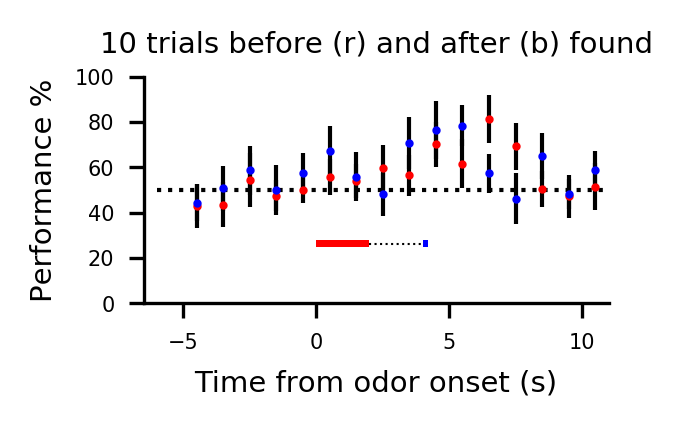

In [297]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

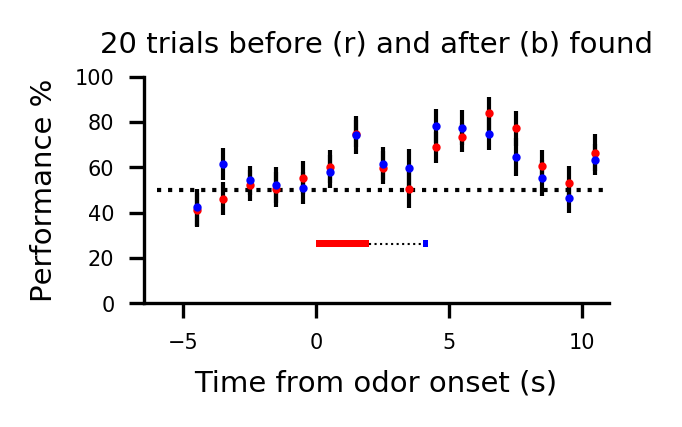

In [298]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

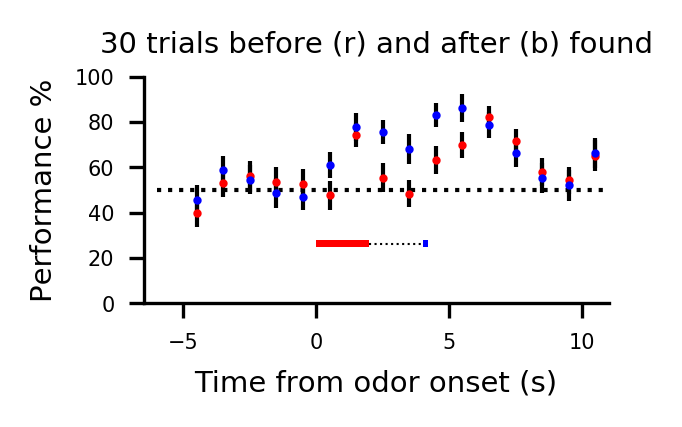

In [299]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [342]:
patterns_tb = {}
labels = {}
found = {}

for ani in d1_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in d1_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [343]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15


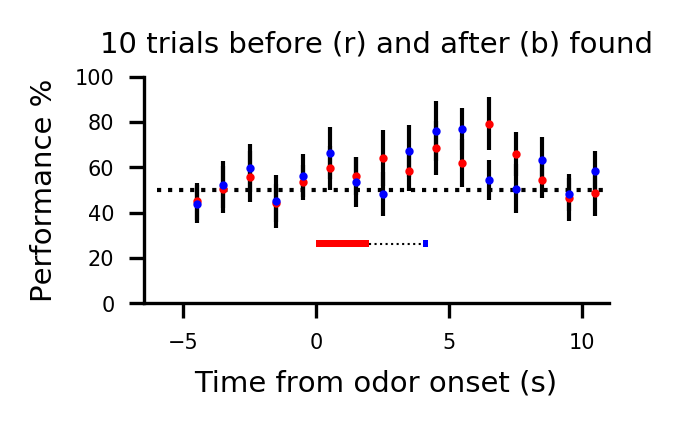

In [344]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

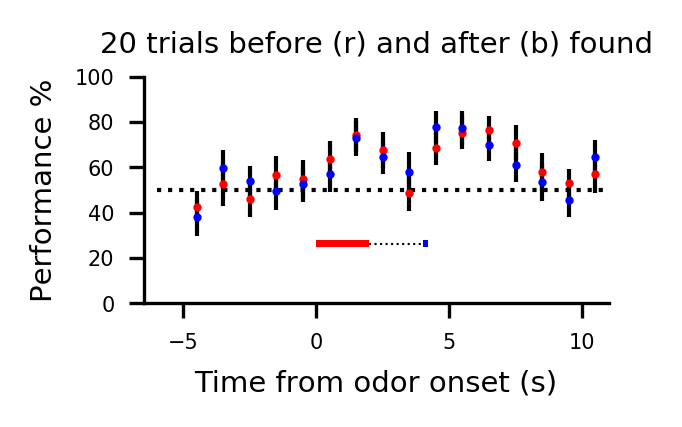

In [345]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

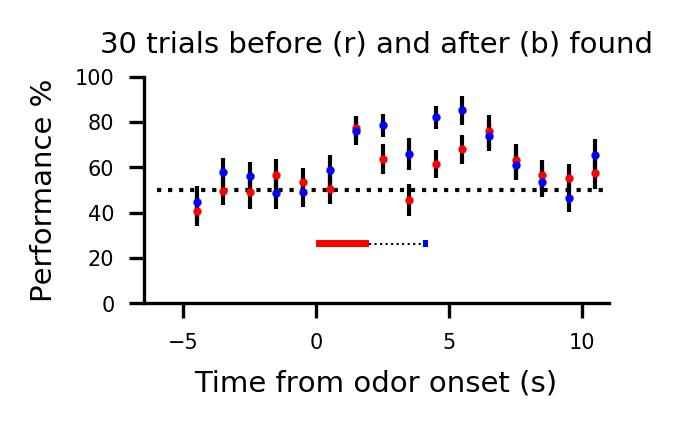

In [346]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [337]:
patterns_tb = {}
labels = {}
found = {}

for ani in d2_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in d2_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [338]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15


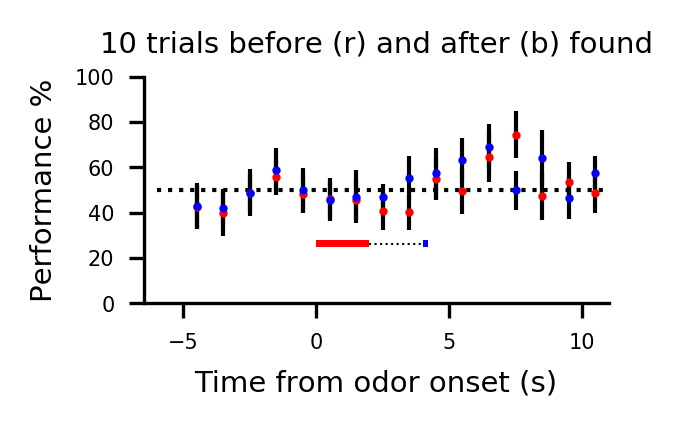

In [339]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

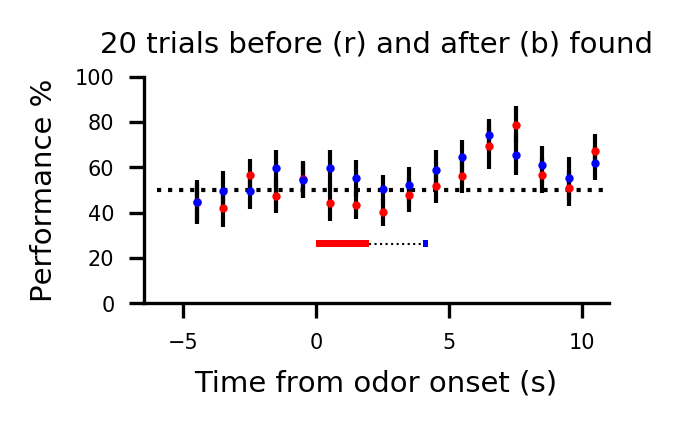

In [340]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

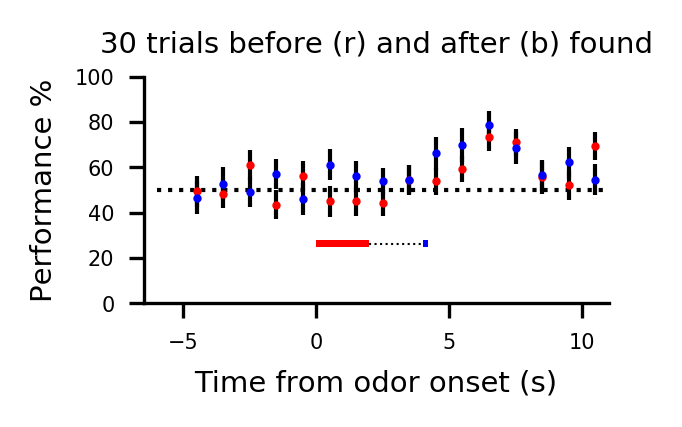

In [341]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [300]:
loop_opt = [10,20,30]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-5-loo:found['%s']-5]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-5-loo:found['%s']-5]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-5:loo+found['%s']-5]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-5:loo+found['%s']-5]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [301]:
found

{'90': 47,
 '91': 81,
 'c10m8': 55,
 'c3f2': 144,
 'c3f3': 136,
 'c3m1': 128,
 'c3m2': 49,
 'c4m3': 57,
 'c4m4': 40}

In [302]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15


In [303]:
np.mean(scores_tb_b_10_0[0])


0.52444999999999997

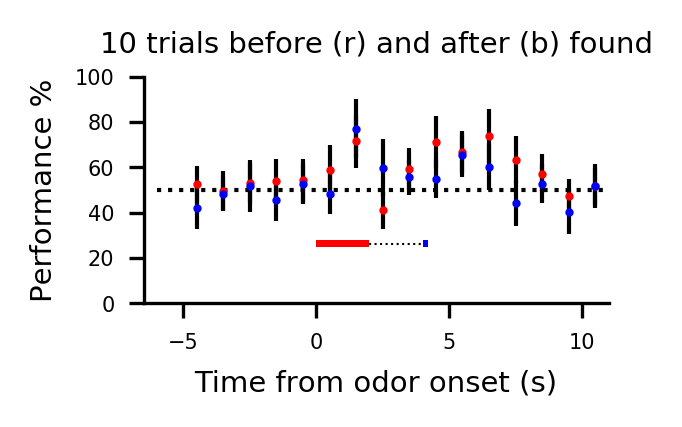

In [304]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

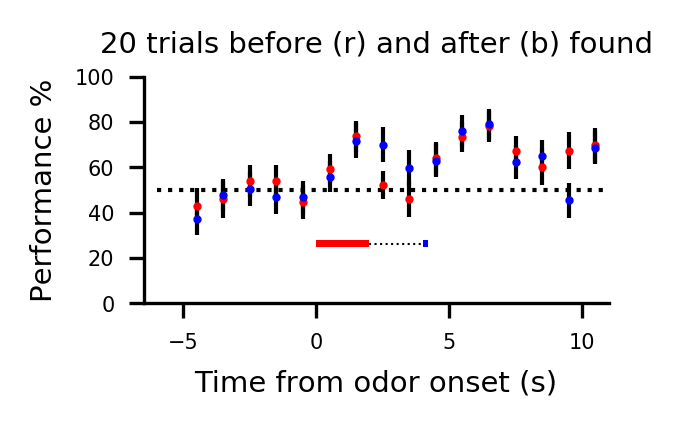

In [305]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

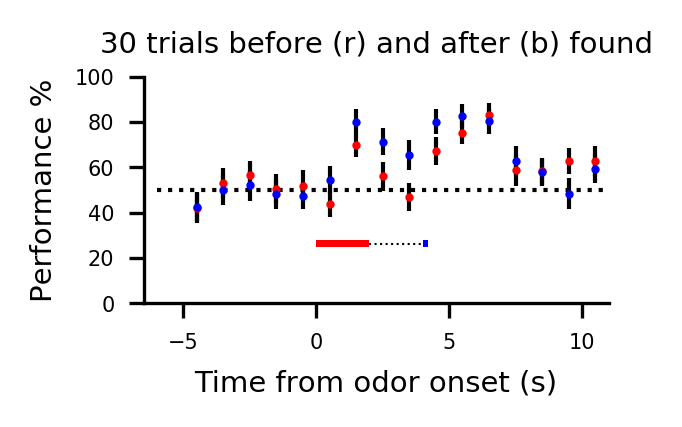

In [306]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [307]:
loop_opt = [10,20,30,]

shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-shift-loo:found['%s']-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-shift-loo:found['%s']-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+shift:loo+found['%s']+shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+shift:loo+found['%s']+shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [308]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15


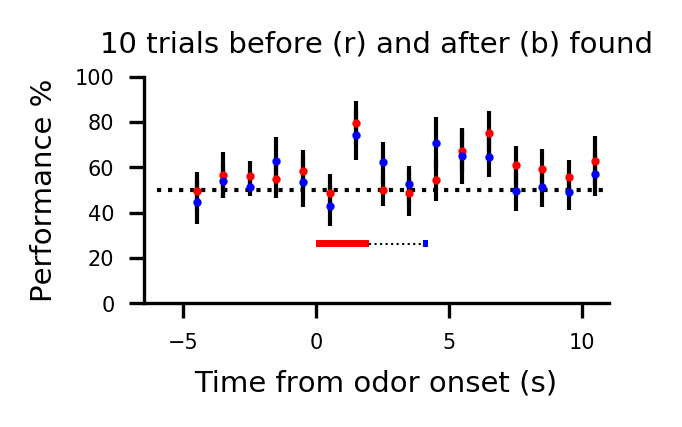

In [309]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

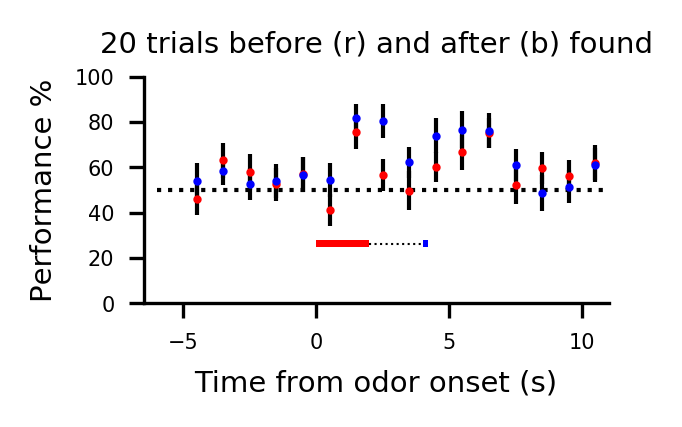

In [310]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

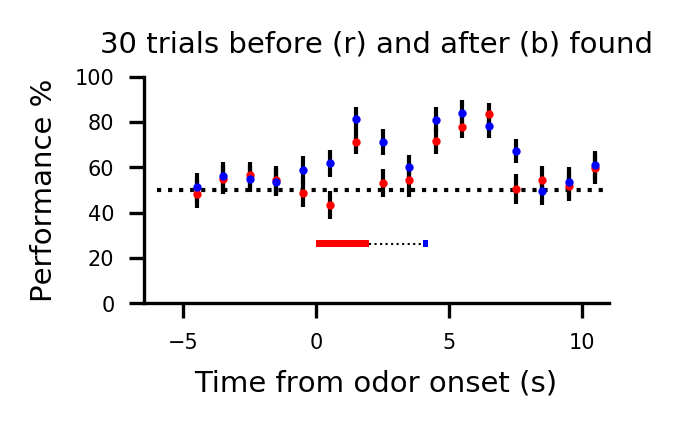

In [311]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
loop_opt = [10,20,30,40]

shift = 5
ex_shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
all_animals  = ('c3m2', 'c4m3', 'c10m8', '90', '91',)
d1_animals  = ('c3m2', 'c4m3', 'c10m8', '90','91')

# do day 1 and day 2 but ignore mice that are cut off
# in OFC could decode CS right before AHA

#compare decoding odor and trace, 

#vijay cross time bin decoders, selectivity isn't as striking

#should include catch trials when discussing expect outcome




In [ ]:
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
loop_opt = [10,20,30,40]

shift = 5
ex_shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [312]:
found

{'90': 47,
 '91': 81,
 'c10m8': 55,
 'c3f2': 144,
 'c3f3': 136,
 'c3m1': 128,
 'c3m2': 49,
 'c4m3': 57,
 'c4m4': 40}

In [313]:
found = {'90': 70, '91': 55, 'c3m2': 60, 'c4m3': 55, 'c4m4': 40, 'c10m8': 57, }
#max’s found: c3m2 (~60), c3f2 (128), c3f3 (132), c3m1 (130),  c4m3(22 or 122), c4m4(38), c10m8(57), 90(70), 91(55), 92(170)


In [314]:
all_animals = ('c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91',)

In [315]:
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [316]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15


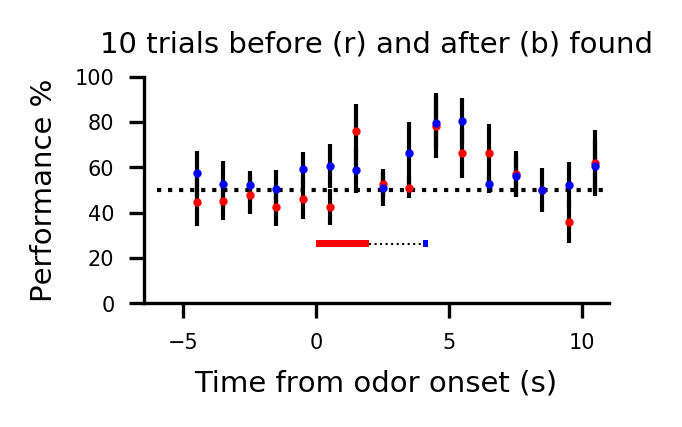

In [317]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

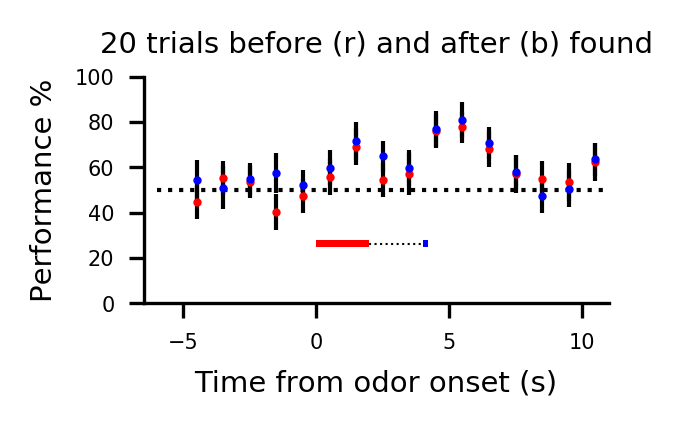

In [318]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

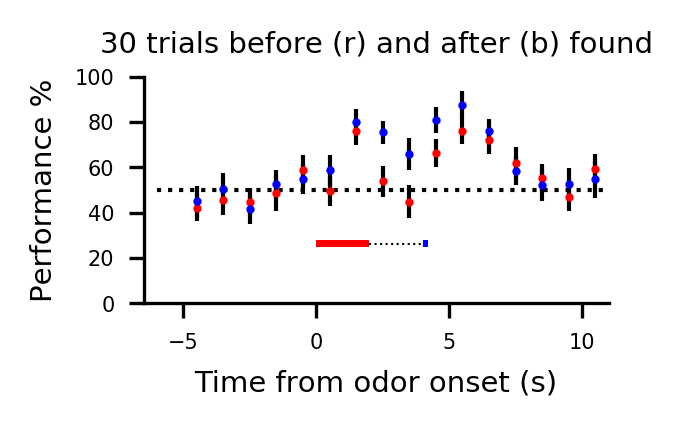

In [319]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

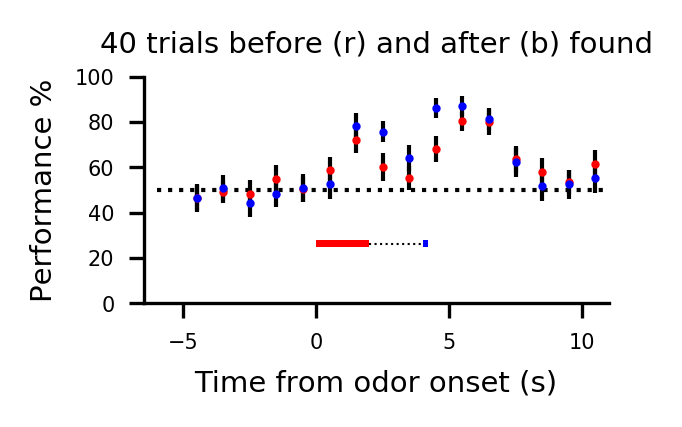

In [320]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [321]:
all_animals = ('c3m2', 'c4m3', 'c10m8', '90', '91',)

In [322]:
loop_opt = [10,20,30,40]

shift = 5
ex_shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [323]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15


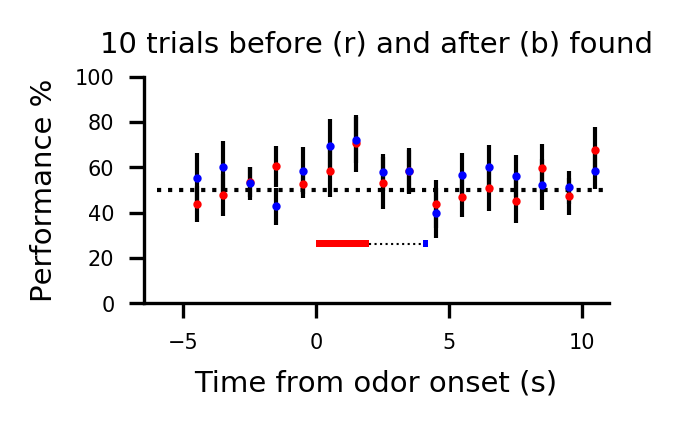

In [324]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

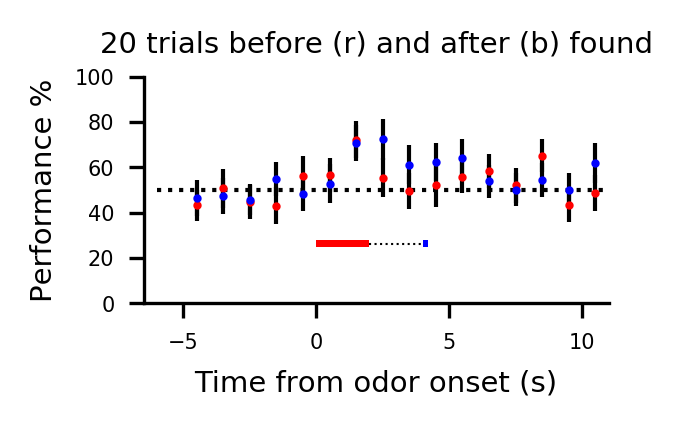

In [325]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

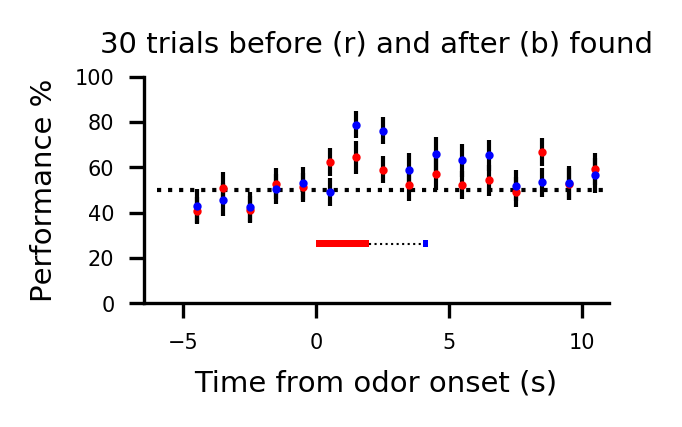

In [326]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

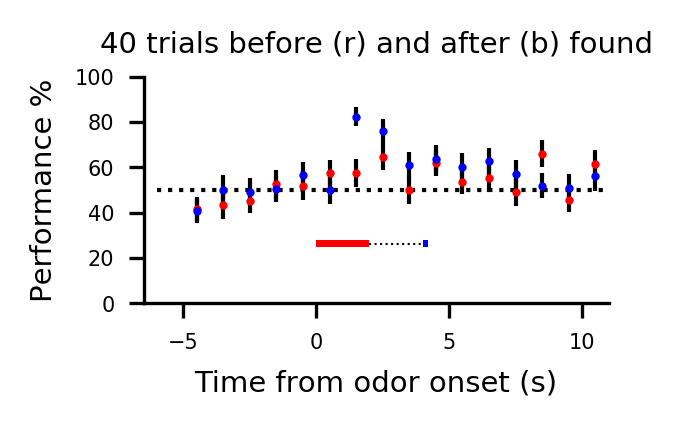

In [327]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [328]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
